<a href="https://colab.research.google.com/github/farhansyed13/internshipproject/blob/main/Liver_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import dataset
liver = pd.read_csv("Liver_patient.csv")

# Domain Analysis

1.The data speaks about the relation of various biological factors and the
probability of patient having liver disease.

2.Factors:Age_of_the_patient,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin	Albumin_and_Globulin_ratio.

3.Target:to build machine learning models to predict the patients with and without liver disease.

# Basic checks

In [ ]:
# first 5 rows
liver.head()

,Age_of_the_patient,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# last 5 columns
liver.tail()

,Age_of_the_patient,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
# Basic info
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# Statistical information about columns in the datasets
liver.describe(include="all")

,Age_of_the_patient,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [ ]:
#(rows,columns)
liver.shape

(583, 11)

In [ ]:
# checking datatypes
liver.dtypes

Age_of_the_patient              int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_ratio    float64
Target                          int64
dtype: object

In [ ]:
# Feature of the dataset (labels)
liver.columns

Index(['Age_of_the_patient', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_ratio', 'Target'],
      dtype='object')

# EDA

### Univariate analysis

Number of patients Diagnosed with liver disease:  416
Number of patients Diagnosed with No liver disease:  167


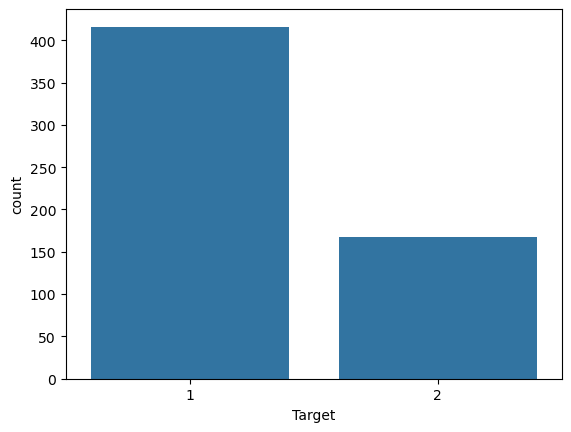

In [ ]:
# Frequency of Patient Diagnosed and not Diagnoised with liver disease
sns.countplot(data=liver, x = 'Target')
Liver_Disease,No_Liver_Disease =liver['Target'].value_counts()
print('Number of patients Diagnosed with liver disease: ',Liver_Disease)
print('Number of patients Diagnosed with No liver disease: ',No_Liver_Disease )

Number of male patient:  441
Number of Female patient: 142


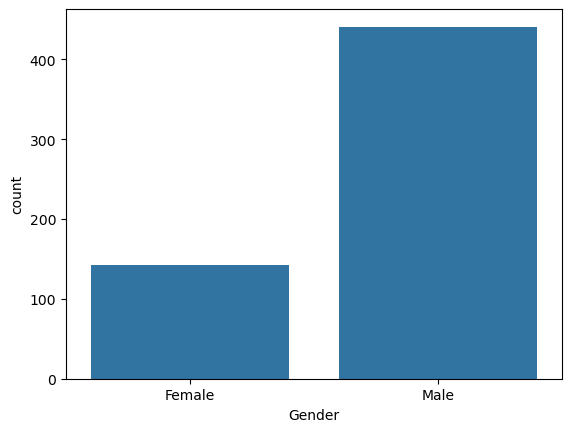

In [ ]:
# Frequency of patient based on their gender
sns.countplot(data=liver, x="Gender")
M,F = liver["Gender"].value_counts()
print('Number of male patient: ',M)
print('Number of Female patient:',F)

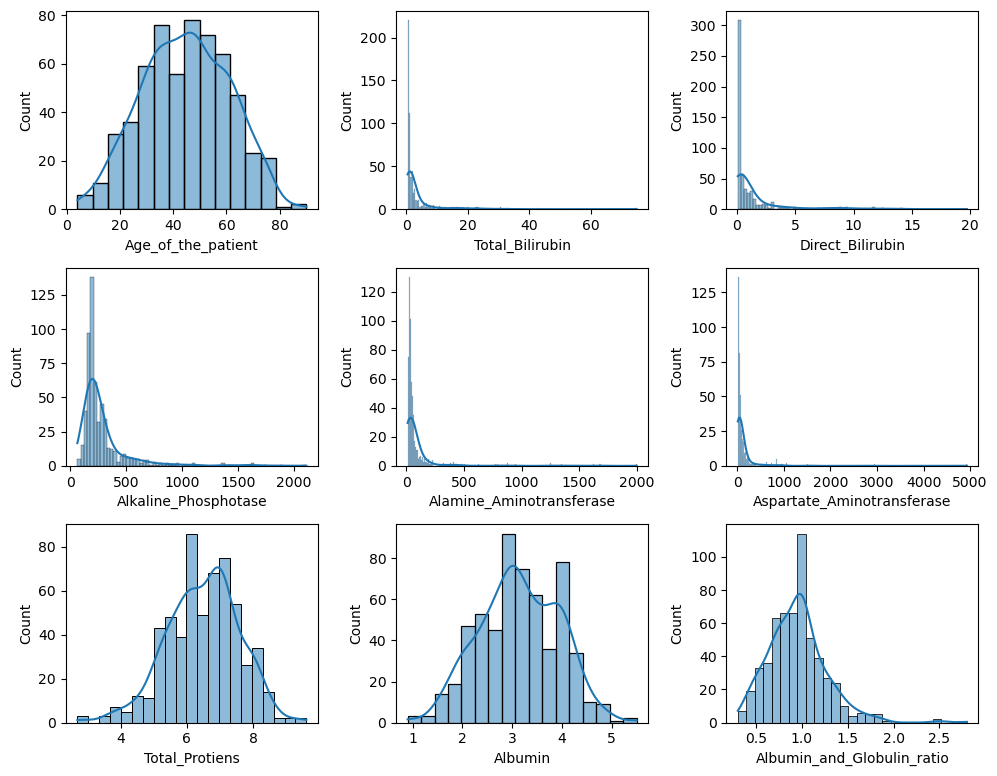

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1
x = liver.drop(['Gender', 'Target'], axis=1)
for column in x:
    plt.subplot(4,3,plotnumber)
    sns.histplot(x[column],kde= True)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

In [ ]:
liver.columns

Index(['Age_of_the_patient', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_ratio', 'Target'],
      dtype='object')

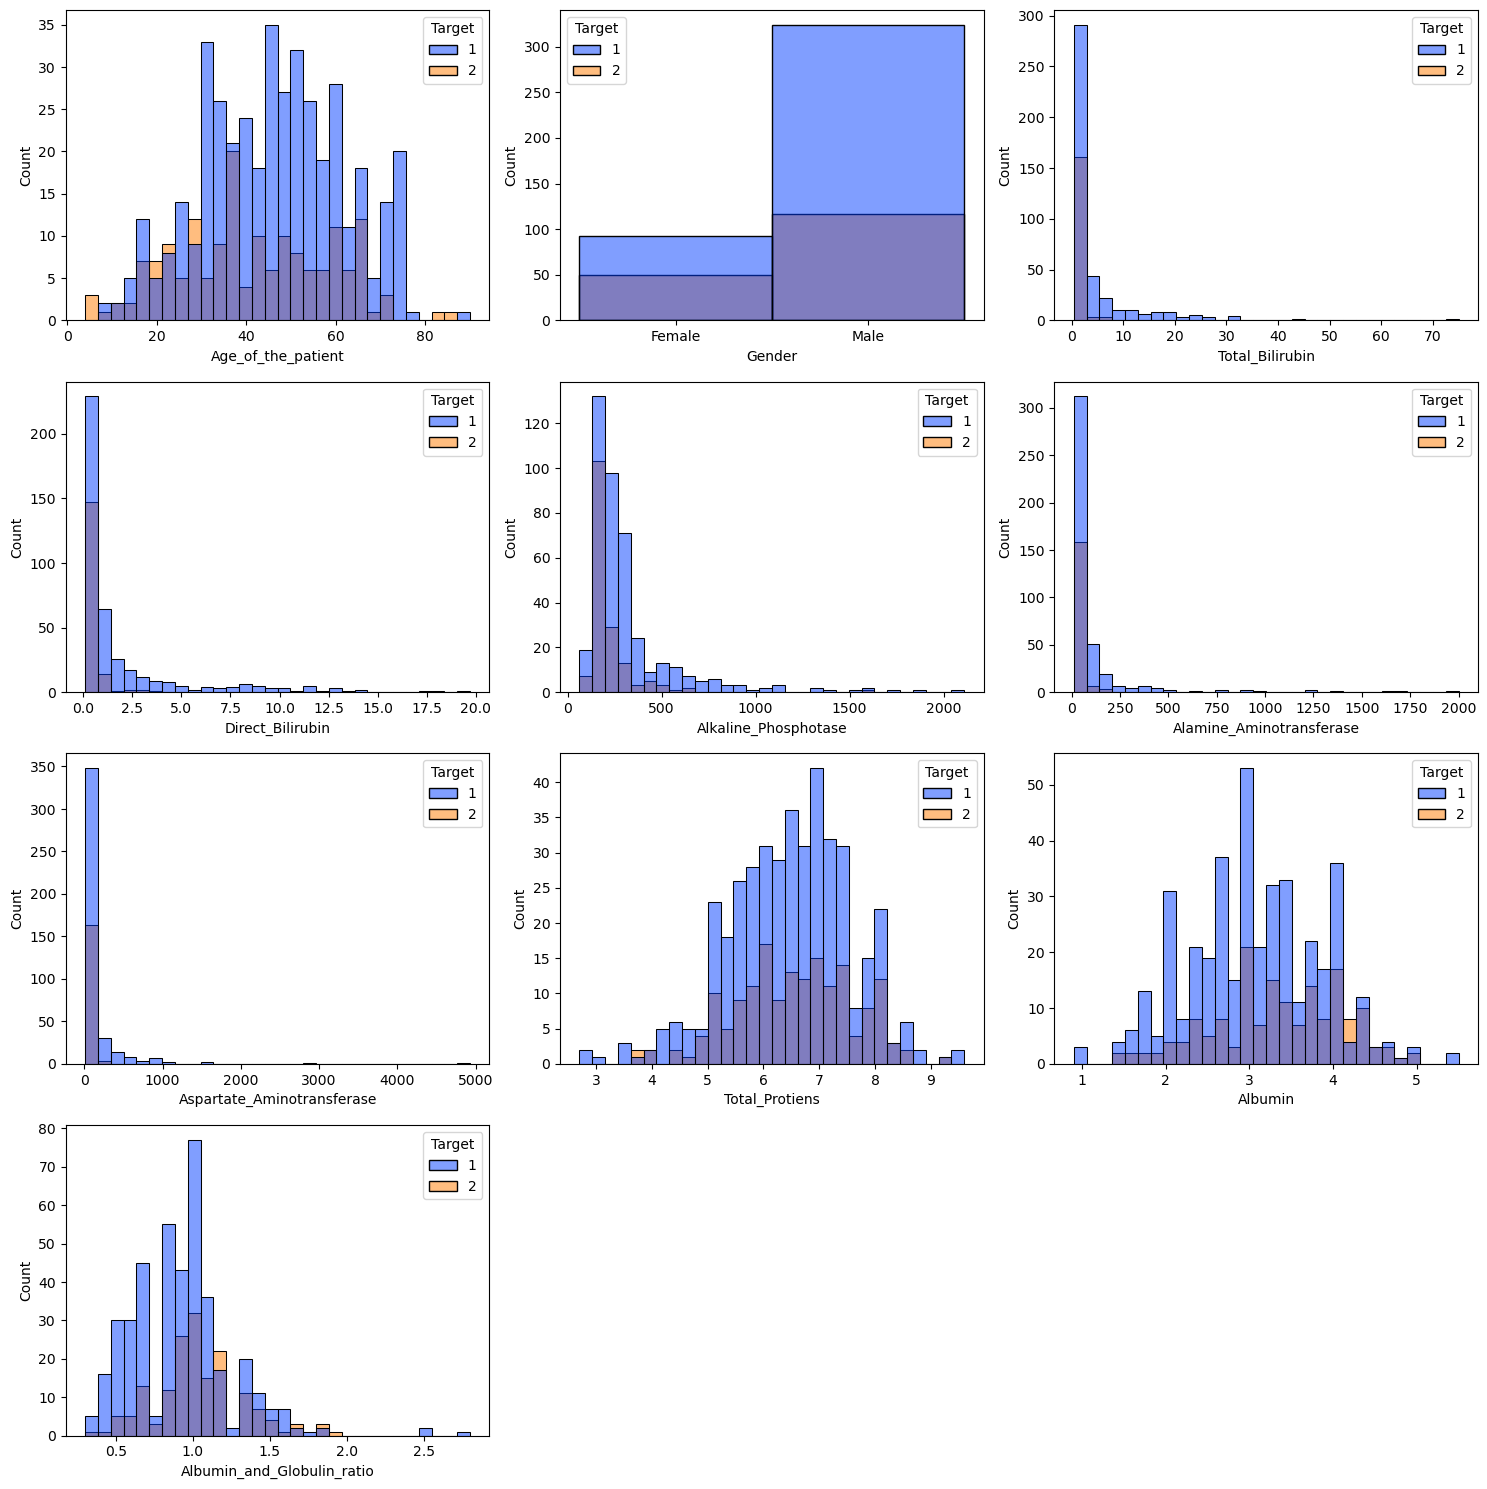

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1

for i in liver.drop('Target',axis=1):
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=liver[i], hue=liver['Target'],palette='bright',bins =30)
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()


### Multivariate Analysis

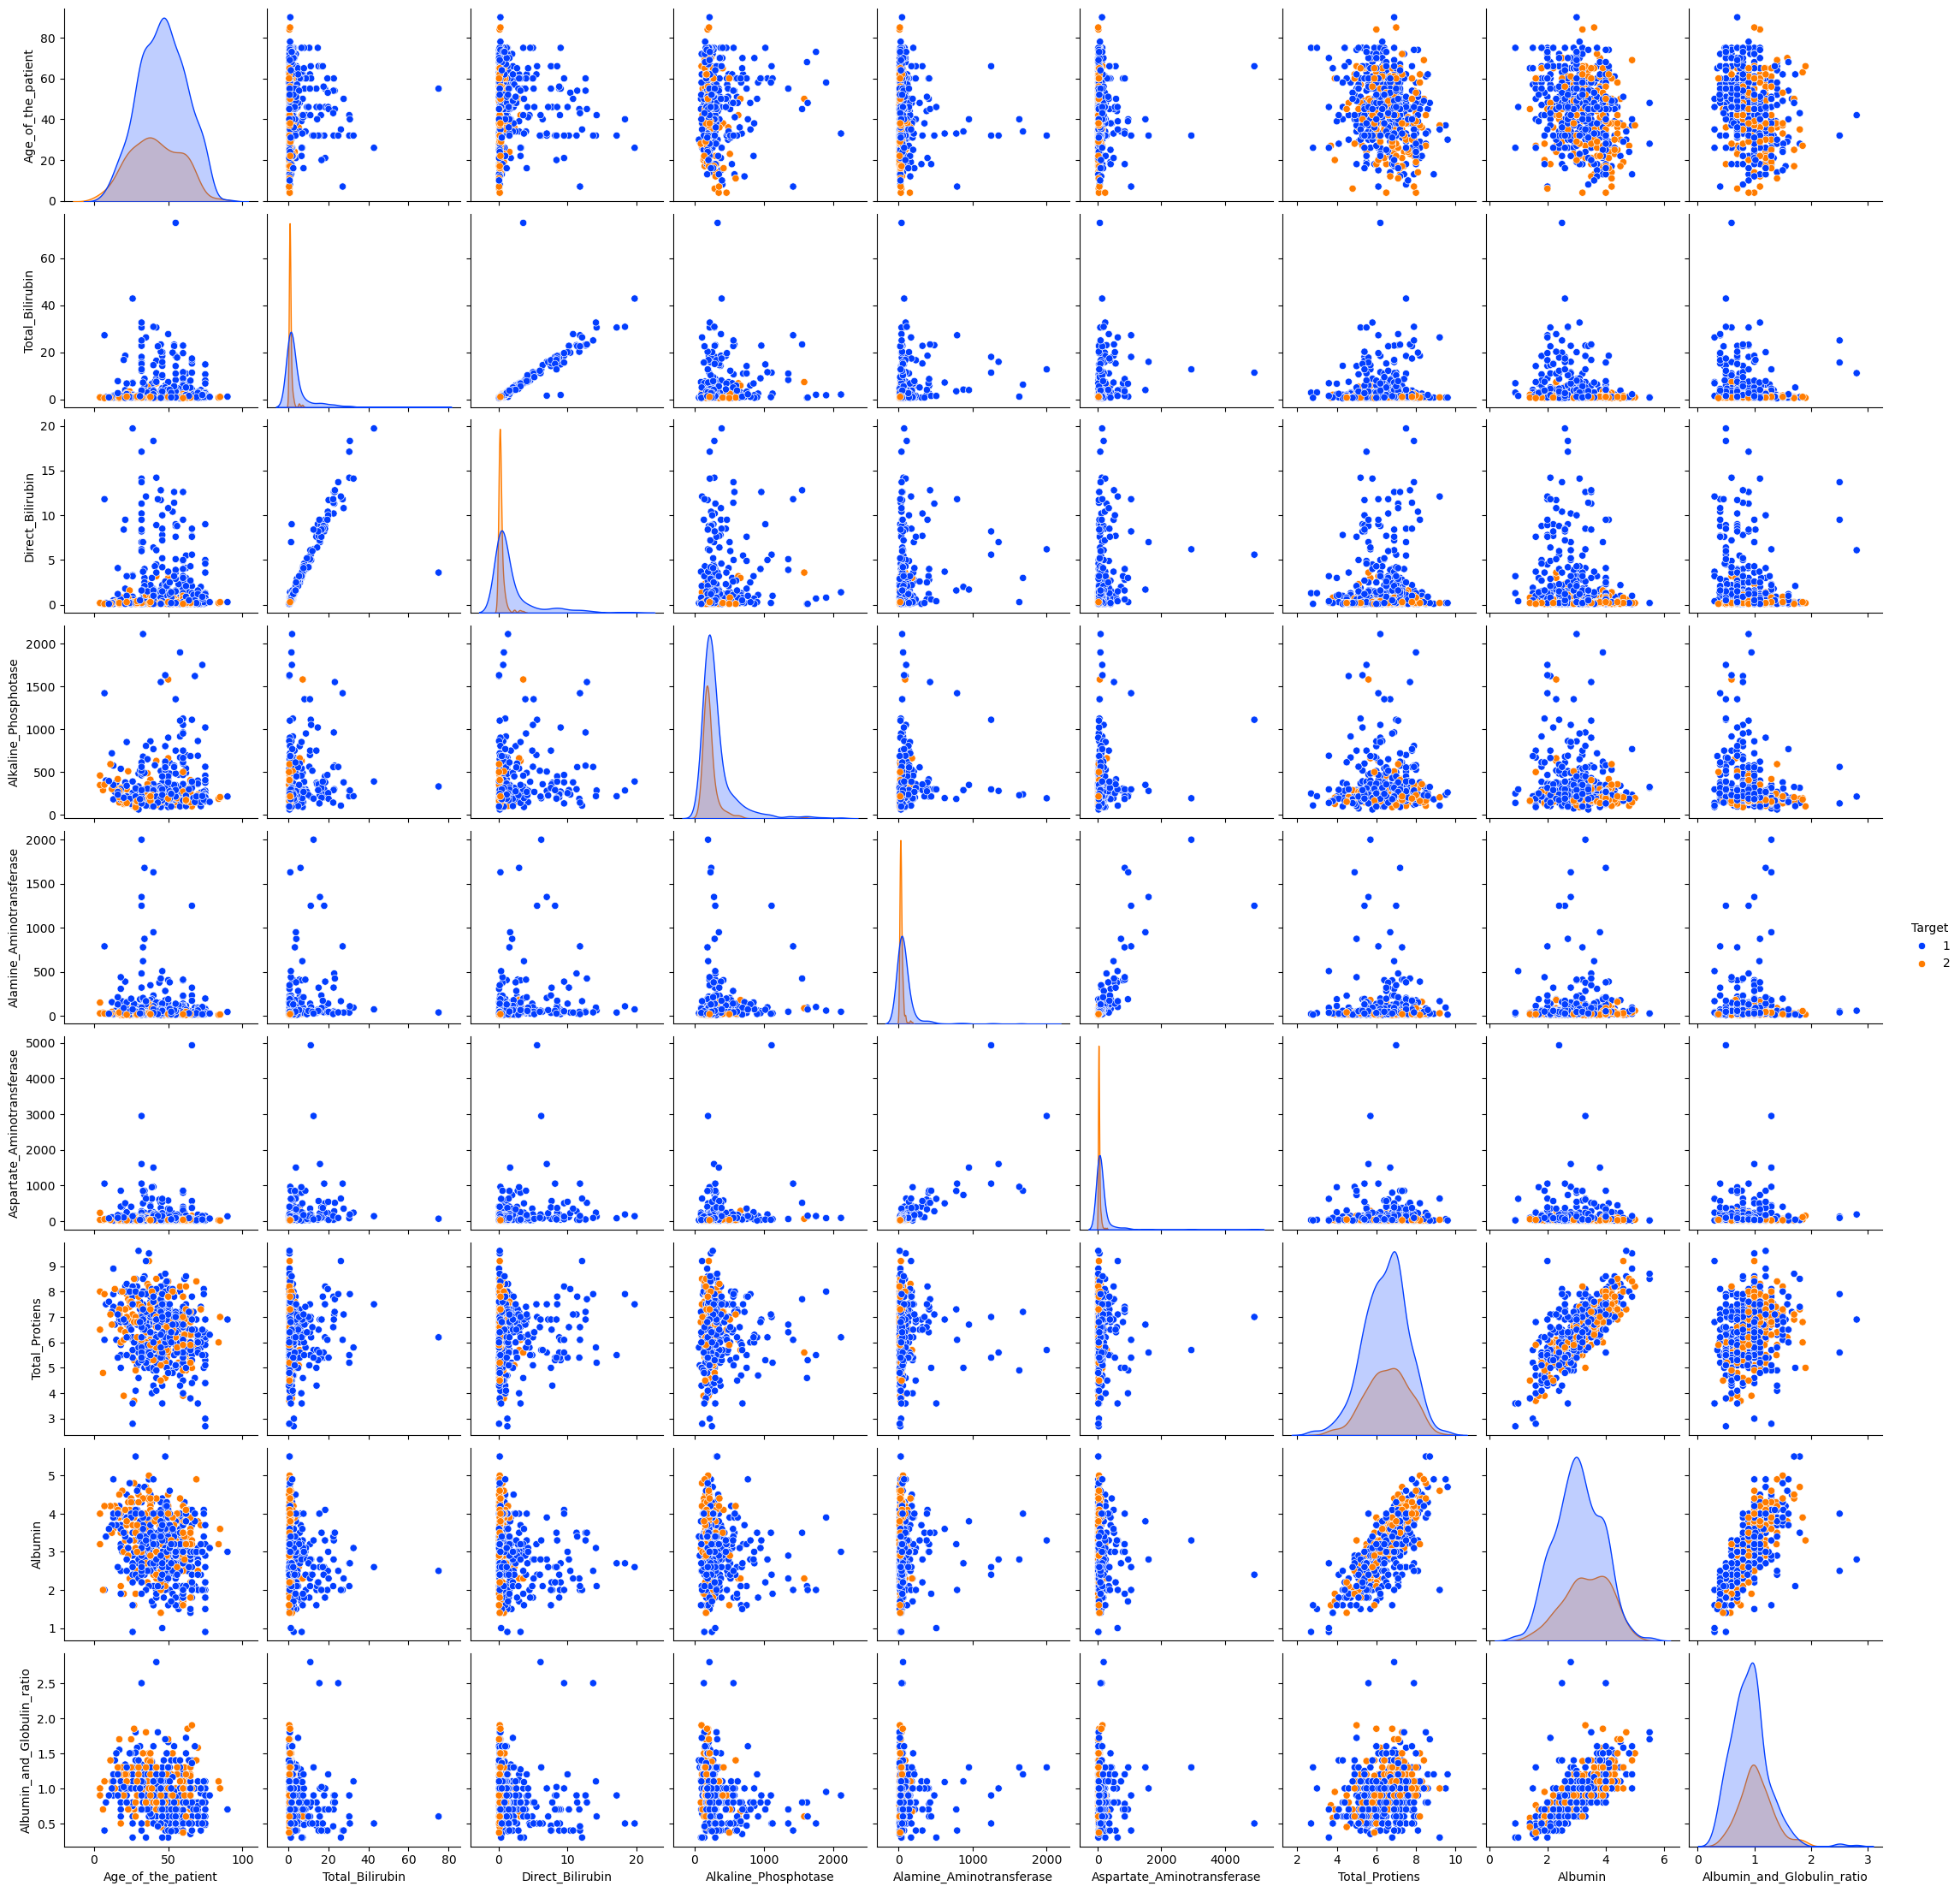

In [ ]:
sns.pairplot(liver,hue= 'Target',palette = 'bright')

# Data Preprocessing

In [ ]:
liver= liver.rename(columns={"Gender":"Sex"})
liver.head(2)

,Age_of_the_patient,Sex,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [ ]:
## replacing Male female with 0 and 1
sex=[]
for i in liver["Sex"]:
    if i =="Female":
        sex.append(1)
    else:
        sex.append(0)


In [ ]:
liver["Sex"]=sex
liver

,Age_of_the_patient,Sex,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#### outlier handling

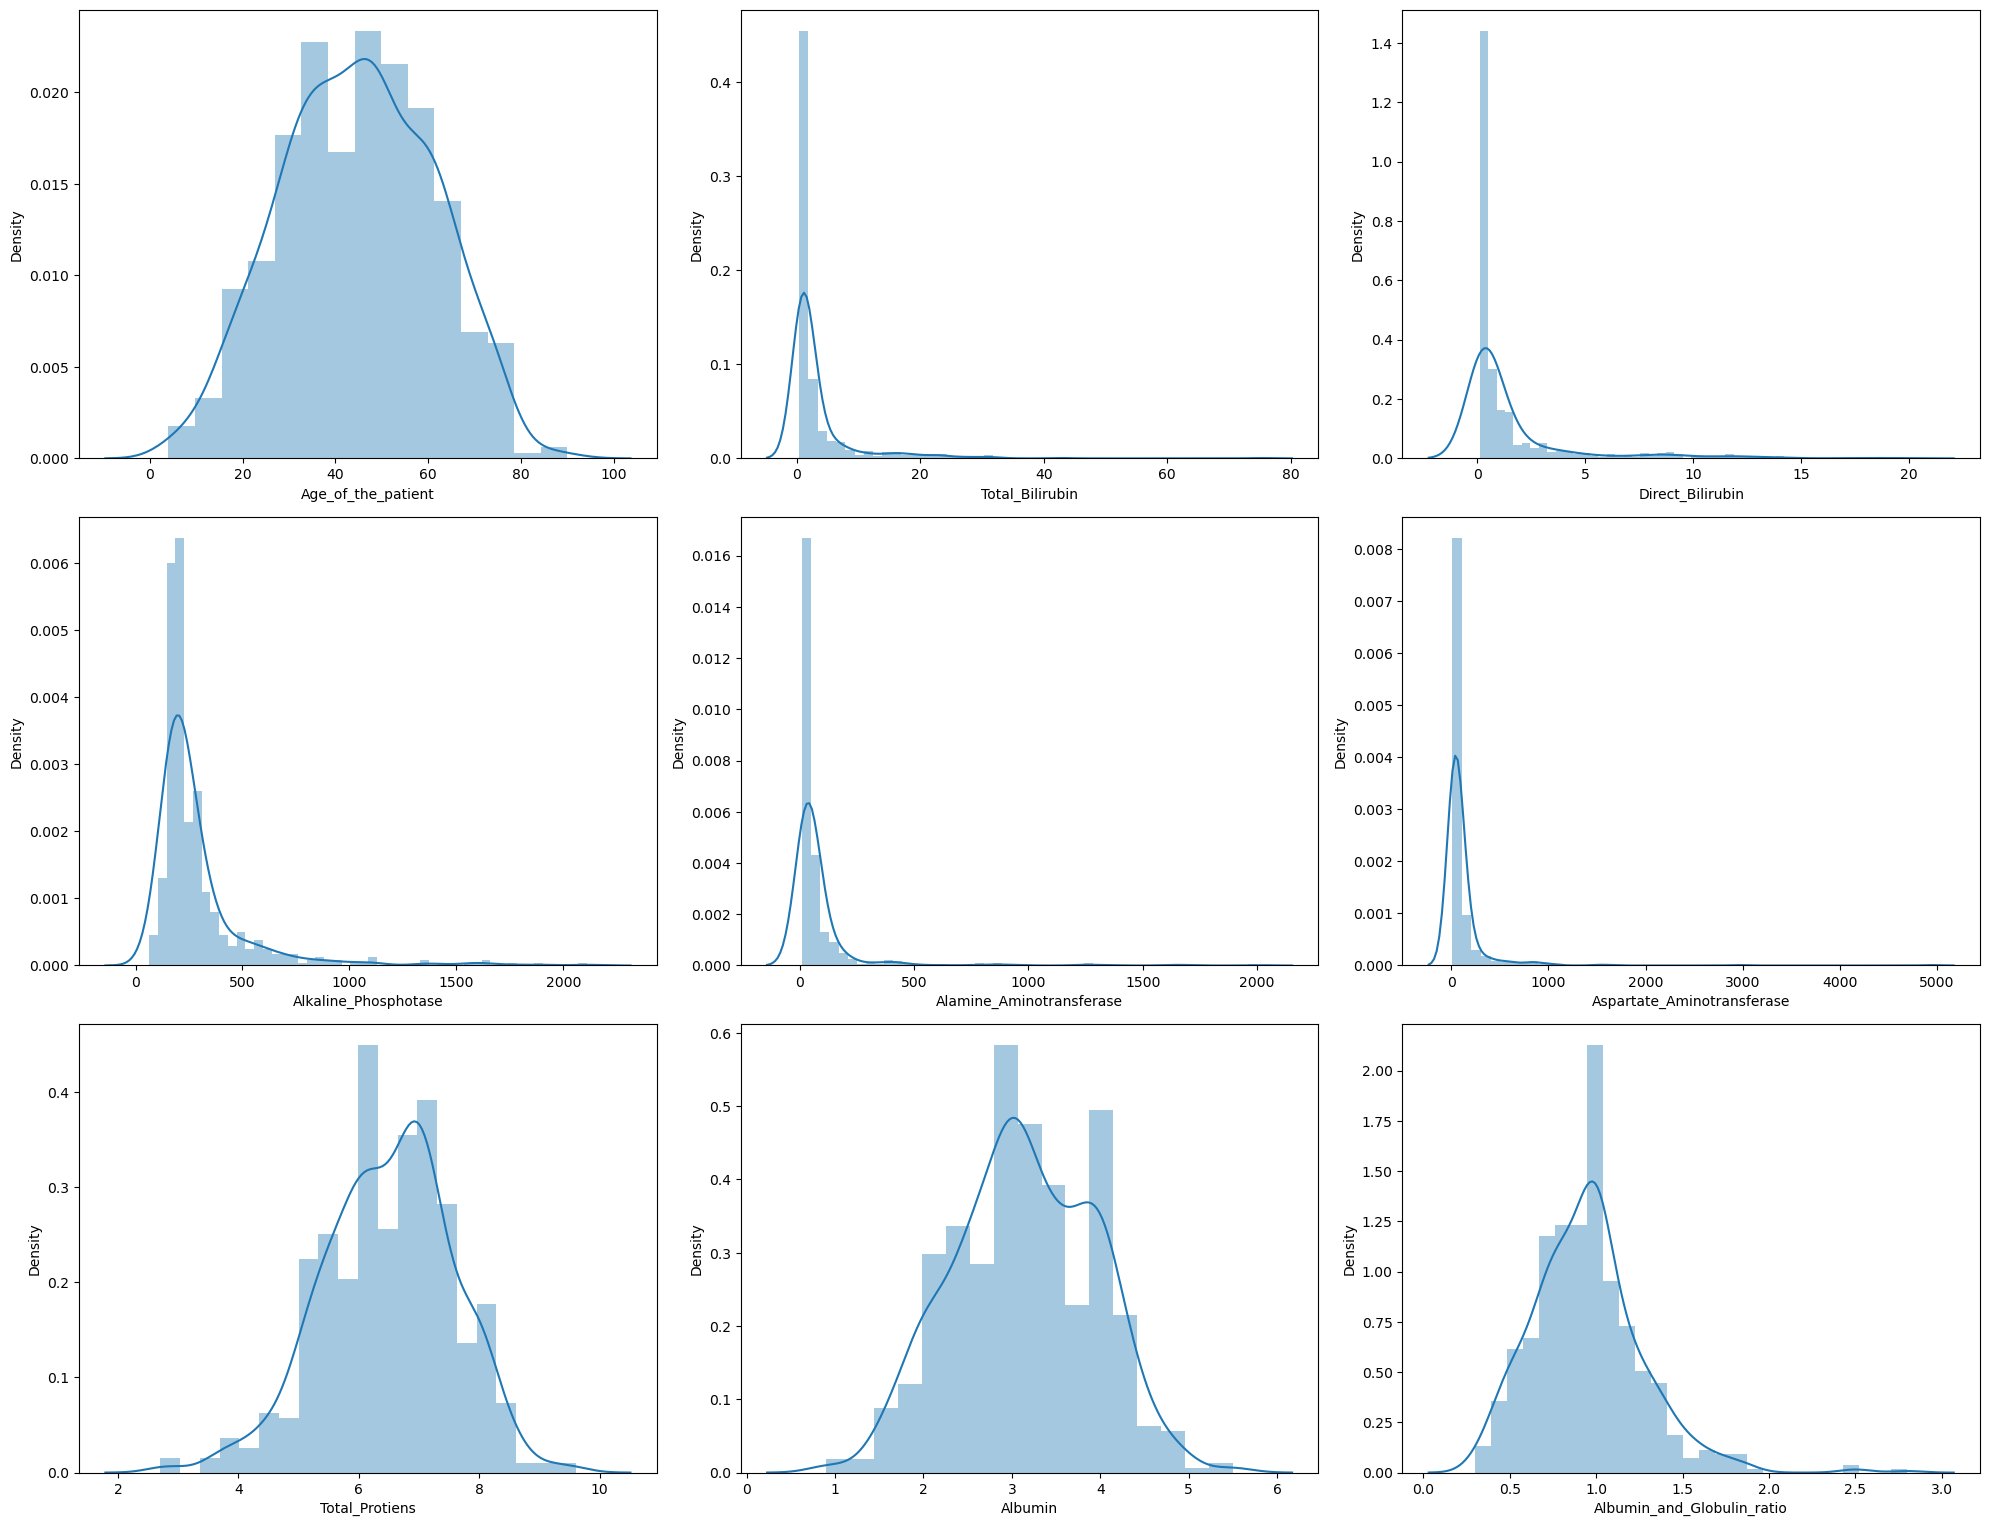

In [ ]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber = 1
for column in liver.drop(['Sex','Target'],axis=1):
    plt.subplot(4,3,plotnumber)
    sns.distplot(liver[column])
    plotnumber+=1
plt.tight_layout()

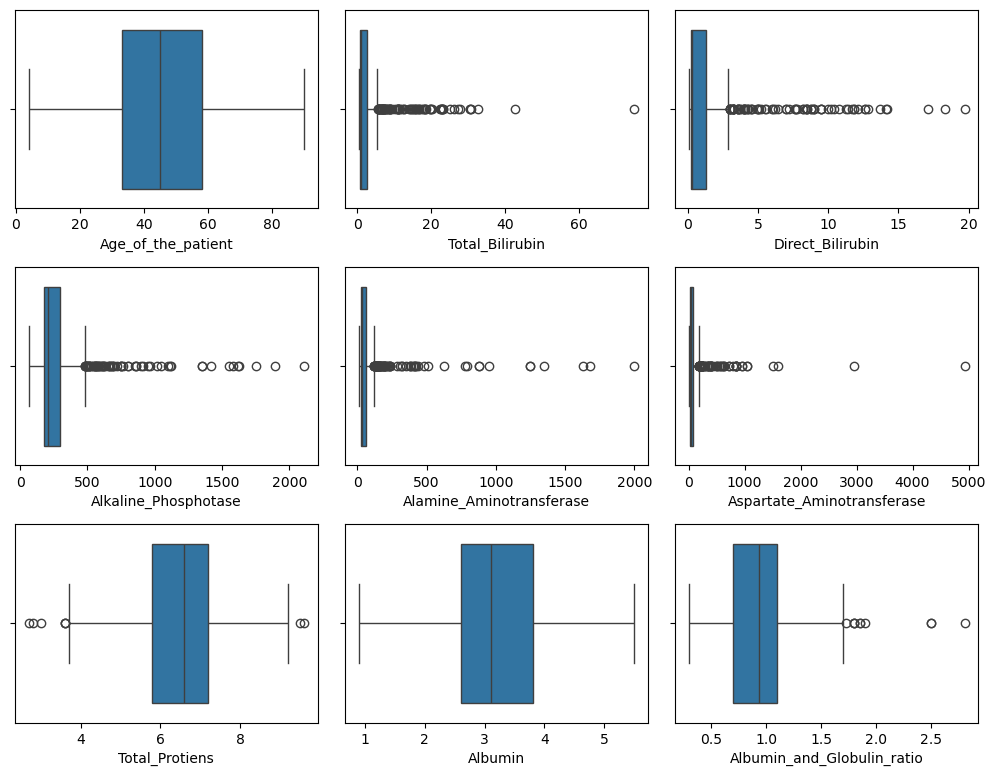

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1
x = liver.drop(['Sex','Target'], axis=1)
for column in x:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(x=x[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
# percentage of outliers above upper bound
for i in liver.drop(['Sex','Target'],axis=1):
    Q1 = liver[i].quantile(0.25)
    Q3 = liver[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Percent = len(liver.loc[liver[i]>upper])/len(liver)*100
    print(f"{i:<30} {Percent:.2f}%")

Age_of_the_patient             0.00%
Total_Bilirubin                14.41%
Direct_Bilirubin               13.89%
Alkaline_Phosphotase           11.84%
Alamine_Aminotransferase       12.52%
Aspartate_Aminotransferase     11.32%
Total_Protiens                 0.34%
Albumin                        0.00%
Albumin_and_Globulin_ratio     1.72%


In [ ]:
# percentage of outliers below lower bound
for i in liver.drop(['Sex','Target'],axis=1):
    Q1 = liver[i].quantile(0.25)
    Q3 = liver[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Percent = len(liver.loc[liver[i]<lower])/len(liver)*100
    print(f"{i:<30} {Percent:.2f}%")

Age_of_the_patient             0.00%
Total_Bilirubin                0.00%
Direct_Bilirubin               0.00%
Alkaline_Phosphotase           0.00%
Alamine_Aminotransferase       0.00%
Aspartate_Aminotransferase     0.00%
Total_Protiens                 1.03%
Albumin                        0.00%
Albumin_and_Globulin_ratio     0.00%


In [ ]:
for i in liver.drop(['Sex','Target'],axis=1):
    Q1 = liver[i].quantile(0.25)
    Q3 = liver[i].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # liver.loc[liver[i]<lower,i] = liver[i].median()
    # liver.loc[liver[i]>upper,i] = liver[i].median()
    print(f"{i:<40}{upper,lower}")


Age_of_the_patient                      (95.5, -4.5)
Total_Bilirubin                         (5.300000000000001, -1.9000000000000001)
Direct_Bilirubin                        (2.95, -1.4500000000000002)
Alkaline_Phosphotase                    (481.75, -8.25)
Alamine_Aminotransferase                (116.75, -33.25)
Aspartate_Aminotransferase              (180.0, -68.0)
Total_Protiens                          (9.3, 3.6999999999999993)
Albumin                                 (5.6, 0.8000000000000005)
Albumin_and_Globulin_ratio              (1.7000000000000002, 0.09999999999999976)


In [ ]:
liver.loc[liver['Albumin_and_Globulin_ratio']>upper,'Albumin_and_Globulin_ratio'] = liver['Albumin_and_Globulin_ratio'].median()

In [ ]:
Q1 = liver['Total_Protiens'].quantile(0.25)
Q3 = liver['Total_Protiens'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
liver.loc[liver['Total_Protiens']<lower,'Total_Protiens'] = liver['Total_Protiens'].median()
liver.loc[liver['Total_Protiens']>upper,'Total_Protiens'] = liver['Total_Protiens'].median()

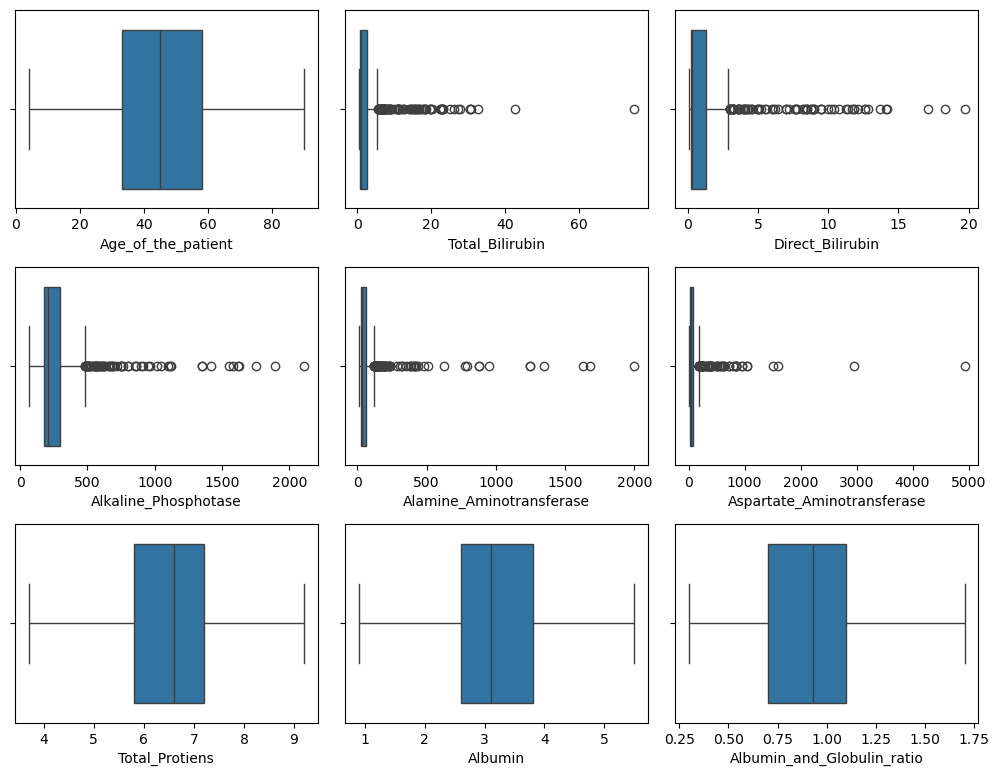

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1
x = liver.drop(['Sex','Target'], axis=1)
for column in x:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(x=x[column])
    plotnumber+=1
plt.tight_layout()

#### Null and Duplicates

In [ ]:
liver.isnull().sum()

Age_of_the_patient            0
Sex                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_ratio    4
Target                        0
dtype: int64

In [ ]:
liver.loc[liver['Albumin_and_Globulin_ratio'].isnull()]

,Age_of_the_patient,Sex,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
liver = liver.fillna(liver.median())

In [ ]:
liver.isnull().sum()

Age_of_the_patient            0
Sex                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_ratio    0
Target                        0
dtype: int64

In [ ]:
liver.duplicated().sum()

13

In [ ]:
# Display all duplicates, including the first occurrences
duplicate = liver[liver.duplicated(keep=False)]
duplicate

,Age_of_the_patient,Sex,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [ ]:
liver =liver.drop_duplicates()
len(liver)

570

In [ ]:
liver['Target'] = liver['Target'].replace(2, 0)
liver
# 1 : patient with liver disease
# 0: patient with no liver disease

,Age_of_the_patient,Sex,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Feature Selection

In [ ]:
liver.shape

(570, 11)

<Axes: >

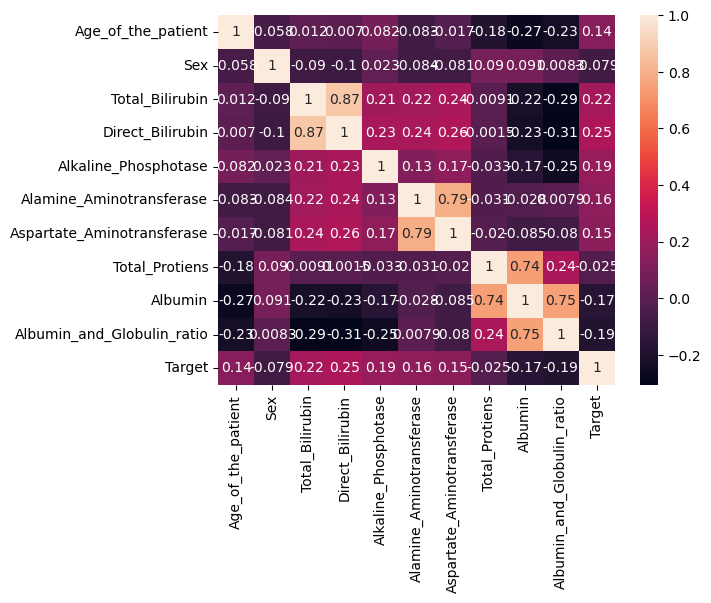

In [ ]:
sns.heatmap(liver.corr(),annot=True)

In [ ]:
# drop direct bilirubin
data = liver.copy()

In [ ]:
data.drop('Direct_Bilirubin',axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Age_of_the_patient            0
Sex                           0
Total_Bilirubin               0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_ratio    0
Target                        0
dtype: int64

# Model Building

In [ ]:
x = liver.drop('Target', axis=1)
y = liver['Target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (456, 10)
Testing set shape: (114, 10)


In [ ]:
liver['Target'].value_counts()
# data is unbalanced

Target
1    406
0    164
Name: count, dtype: int64

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_smote))

Counter({1: 325, 0: 131})
Counter({1: 325, 0: 325})


In [ ]:
scaler = StandardScaler()
x_scale_train = scaler.fit_transform(x_smote)
x_scale_test = scaler.transform(x_test)

In [ ]:
x_scale_train

array([[ 0.13823731, -0.47826087, -0.36931359, ..., -0.51554035,
        -0.26751009,  0.20109889],
       [ 0.38645347, -0.47826087,  0.65619506, ..., -0.81878484,
        -1.20981215, -1.11848566],
       [ 0.07618327,  2.09090909, -0.34959227, ..., -0.81878484,
        -0.94058299, -0.99852343],
       ...,
       [-0.1720329 , -0.47826087, -0.32726188, ...,  0.32732939,
         0.89059393,  1.17433315],
       [ 0.13823731, -0.47826087, -0.27841858, ...,  0.04688859,
        -0.13591478, -0.27994587],
       [-1.16489755, -0.47826087,  0.15041999, ...,  0.01389942,
         0.36533349,  0.57170253]])

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC-AUC if predict_proba is available
    auc = None
    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"ROC-AUC: {auc:.4f}")
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    print("\nConfusion Matrix:")
    print(cm)

    # Visualization of confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

 # Return model and metrics
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7719
Precision: 0.9231
Recall: 0.7407
F1 Score: 0.8219
ROC-AUC: 0.8500
Cross-validation Accuracy: 0.6923 ± 0.0563

Confusion Matrix:
[[28  5]
 [21 60]]


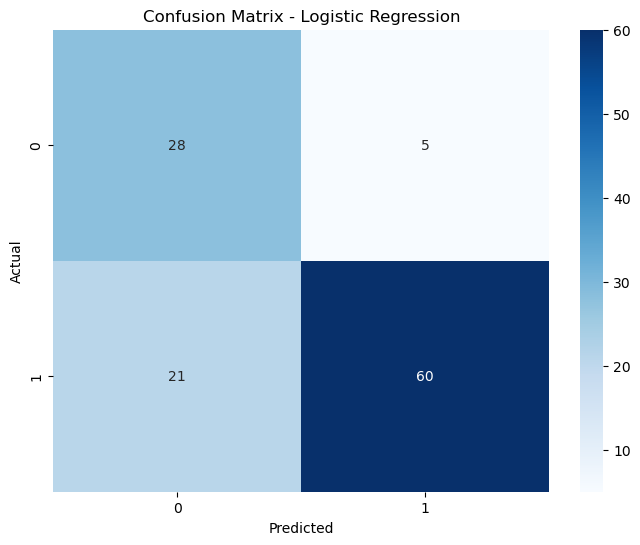

Training Random Forest...

Random Forest Results:
Accuracy: 0.7544
Precision: 0.8046
Recall: 0.8642
F1 Score: 0.8333
ROC-AUC: 0.7989
Cross-validation Accuracy: 0.8031 ± 0.0251

Confusion Matrix:
[[16 17]
 [11 70]]


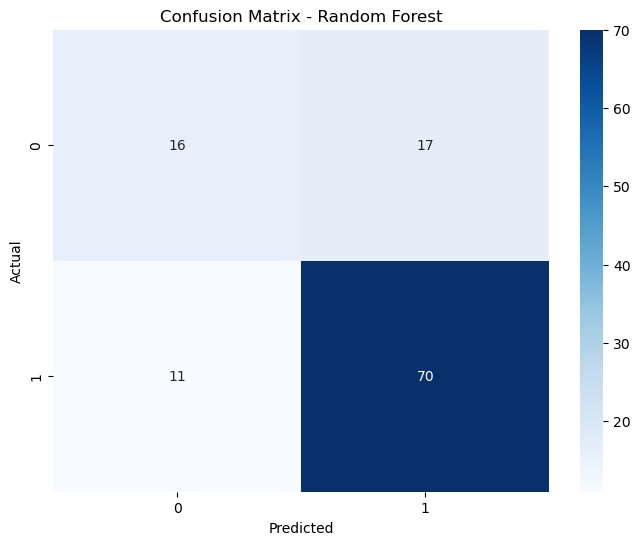

Training Support Vector Machine...

Support Vector Machine Results:
Accuracy: 0.7105
Precision: 0.8429
Recall: 0.7284
F1 Score: 0.7815
ROC-AUC: 0.8107
Cross-validation Accuracy: 0.7108 ± 0.0523

Confusion Matrix:
[[22 11]
 [22 59]]


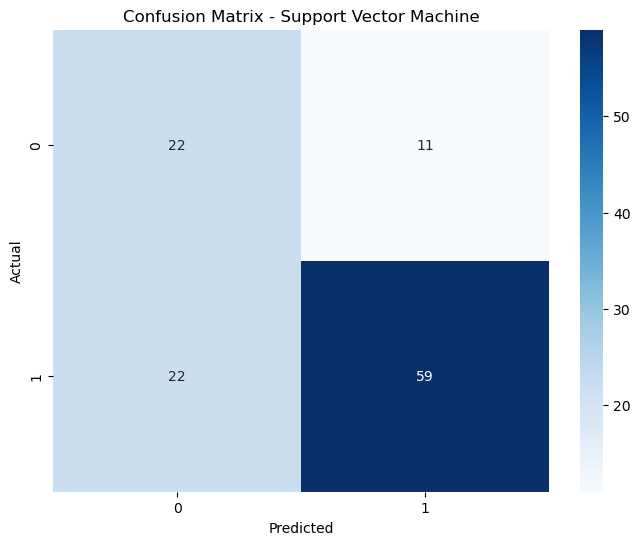

Training K-Nearest Neighbors...

K-Nearest Neighbors Results:
Accuracy: 0.6667
Precision: 0.8028
Recall: 0.7037
F1 Score: 0.7500
ROC-AUC: 0.7286
Cross-validation Accuracy: 0.6877 ± 0.0478

Confusion Matrix:
[[19 14]
 [24 57]]


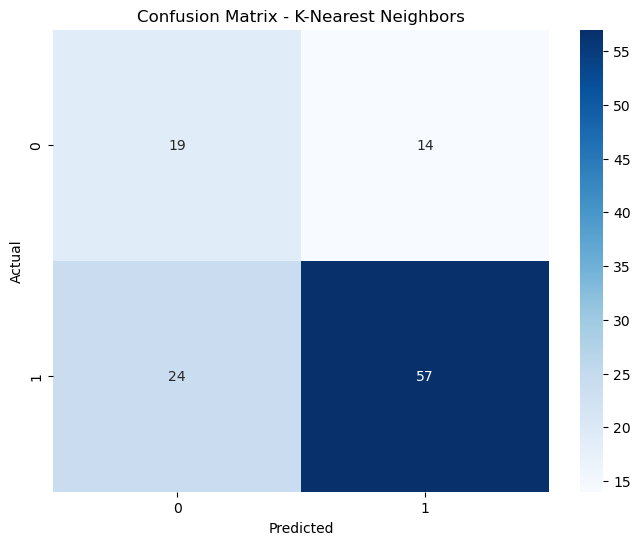

Training Gradient Boosting...

Gradient Boosting Results:
Accuracy: 0.7281
Precision: 0.7604
Recall: 0.9012
F1 Score: 0.8249
ROC-AUC: 0.8025
Cross-validation Accuracy: 0.7538 ± 0.0243

Confusion Matrix:
[[10 23]
 [ 8 73]]


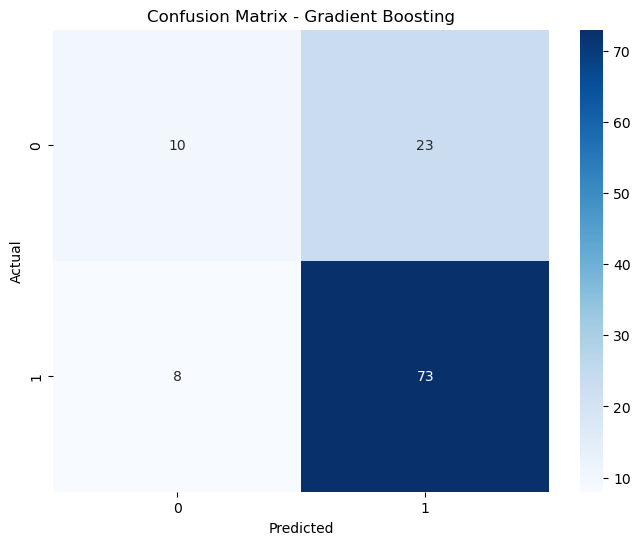

In [ ]:
# 1. Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_results = evaluate_model(lr_model, x_scale_train, y_smote,
                            x_scale_test, y_test, "Logistic Regression")

# 2. Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_results = evaluate_model(rf_model, x_scale_train, y_smote,
                           x_scale_test, y_test, "Random Forest")

# 3. Support Vector Machine
print("Training Support Vector Machine...")
svm_model = SVC(probability=True, random_state=42)
svm_results = evaluate_model(svm_model, x_scale_train, y_smote,
                            x_scale_test, y_test, "Support Vector Machine")

# 4. K-Nearest Neighbors
print("Training K-Nearest Neighbors...")
knn_model = KNeighborsClassifier()
knn_results = evaluate_model(knn_model, x_scale_train, y_smote,
                            x_scale_test, y_test, "K-Nearest Neighbors")

# 5. Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_results = evaluate_model(gb_model, x_scale_train, y_smote,
                           x_scale_test, y_test, "Gradient Boosting")


Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7719
Precision: 0.9231
Recall: 0.7407
F1 Score: 0.8219
ROC-AUC: 0.8500
Cross-validation Accuracy: 0.6923 ± 0.0563

Confusion Matrix:
[[28  5]
 [21 60]]


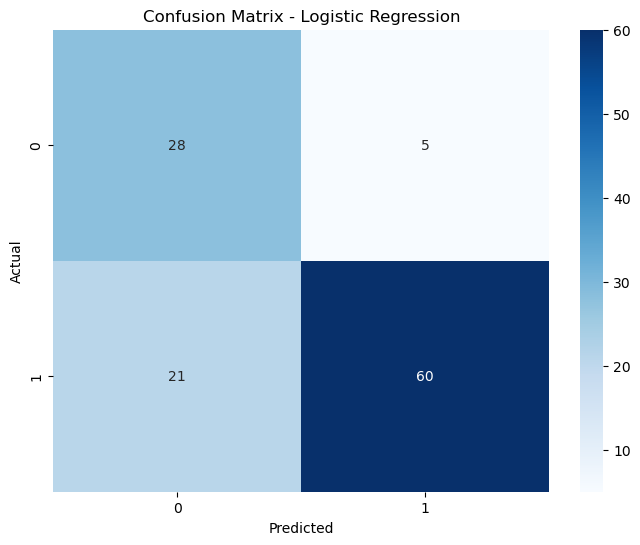

Training Random Forest...

Random Forest Results:
Accuracy: 0.7544
Precision: 0.8046
Recall: 0.8642
F1 Score: 0.8333
ROC-AUC: 0.7989
Cross-validation Accuracy: 0.8031 ± 0.0251

Confusion Matrix:
[[16 17]
 [11 70]]


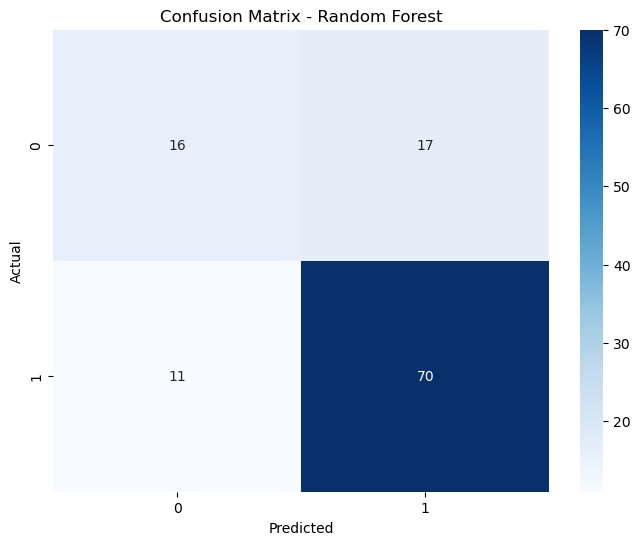

Training Support Vector Machine...

Support Vector Machine Results:
Accuracy: 0.7105
Precision: 0.8429
Recall: 0.7284
F1 Score: 0.7815
ROC-AUC: 0.8107
Cross-validation Accuracy: 0.7108 ± 0.0523

Confusion Matrix:
[[22 11]
 [22 59]]


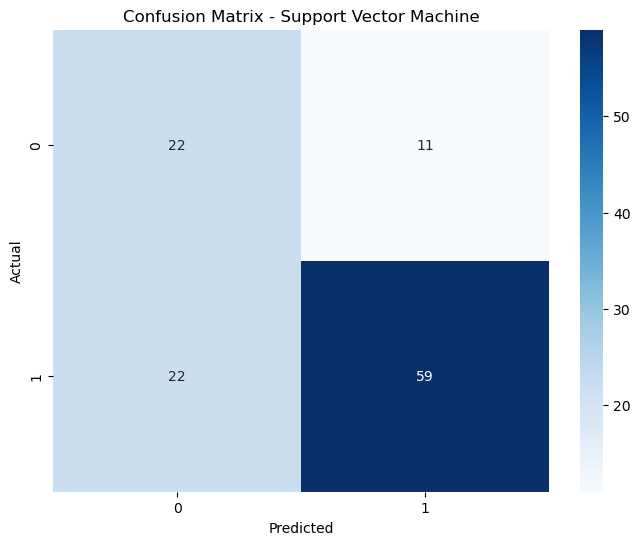

Training K-Nearest Neighbors...

K-Nearest Neighbors Results:
Accuracy: 0.6667
Precision: 0.8028
Recall: 0.7037
F1 Score: 0.7500
ROC-AUC: 0.7286
Cross-validation Accuracy: 0.6877 ± 0.0478

Confusion Matrix:
[[19 14]
 [24 57]]


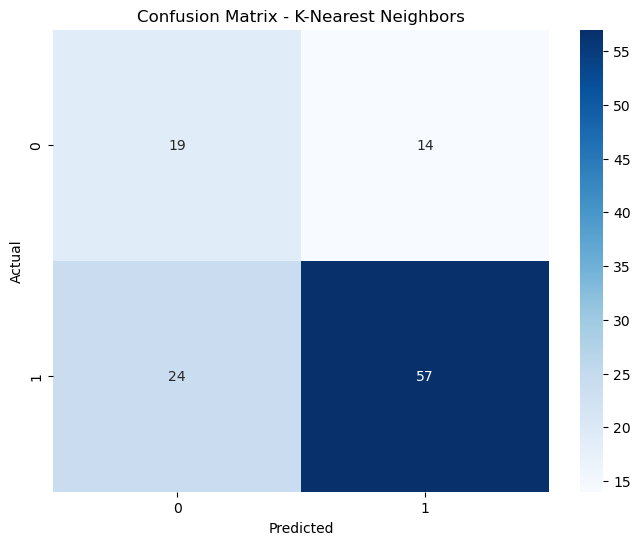

Training Gradient Boosting...

Gradient Boosting Results:
Accuracy: 0.7281
Precision: 0.7604
Recall: 0.9012
F1 Score: 0.8249
ROC-AUC: 0.8025
Cross-validation Accuracy: 0.7538 ± 0.0243

Confusion Matrix:
[[10 23]
 [ 8 73]]


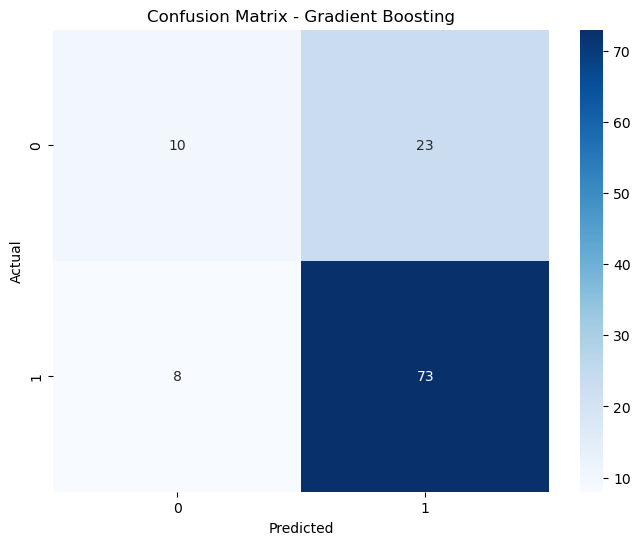

In [ ]:
# Now let's train different models and evaluate them

# 1. Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_results = evaluate_model(lr_model, x_scale_train, y_smote,
                            x_scale_test, y_test, "Logistic Regression")

# 2. Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_results = evaluate_model(rf_model, x_scale_train, y_smote,
                           x_scale_test, y_test, "Random Forest")

# 3. Support Vector Machine
print("Training Support Vector Machine...")
svm_model = SVC(probability=True, random_state=42)
svm_results = evaluate_model(svm_model, x_scale_train, y_smote,
                            x_scale_test, y_test, "Support Vector Machine")

# 4. K-Nearest Neighbors
print("Training K-Nearest Neighbors...")
knn_model = KNeighborsClassifier()
knn_results = evaluate_model(knn_model, x_scale_train, y_smote,
                            x_scale_test, y_test, "K-Nearest Neighbors")

# 5. Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_results = evaluate_model(gb_model, x_scale_train, y_smote,
                           x_scale_test, y_test, "Gradient Boosting")



Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0     Logistic Regression  0.771930   0.923077  0.740741  0.821918  0.849981   
1           Random Forest  0.754386   0.804598  0.864198  0.833333  0.798915   
2  Support Vector Machine  0.710526   0.842857  0.728395  0.781457  0.810700   
3     K-Nearest Neighbors  0.666667   0.802817  0.703704  0.750000  0.728582   
4       Gradient Boosting  0.728070   0.760417  0.901235  0.824859  0.802469   

   CV Accuracy  
0     0.692308  
1     0.803077  
2     0.710769  
3     0.687692  
4     0.753846  


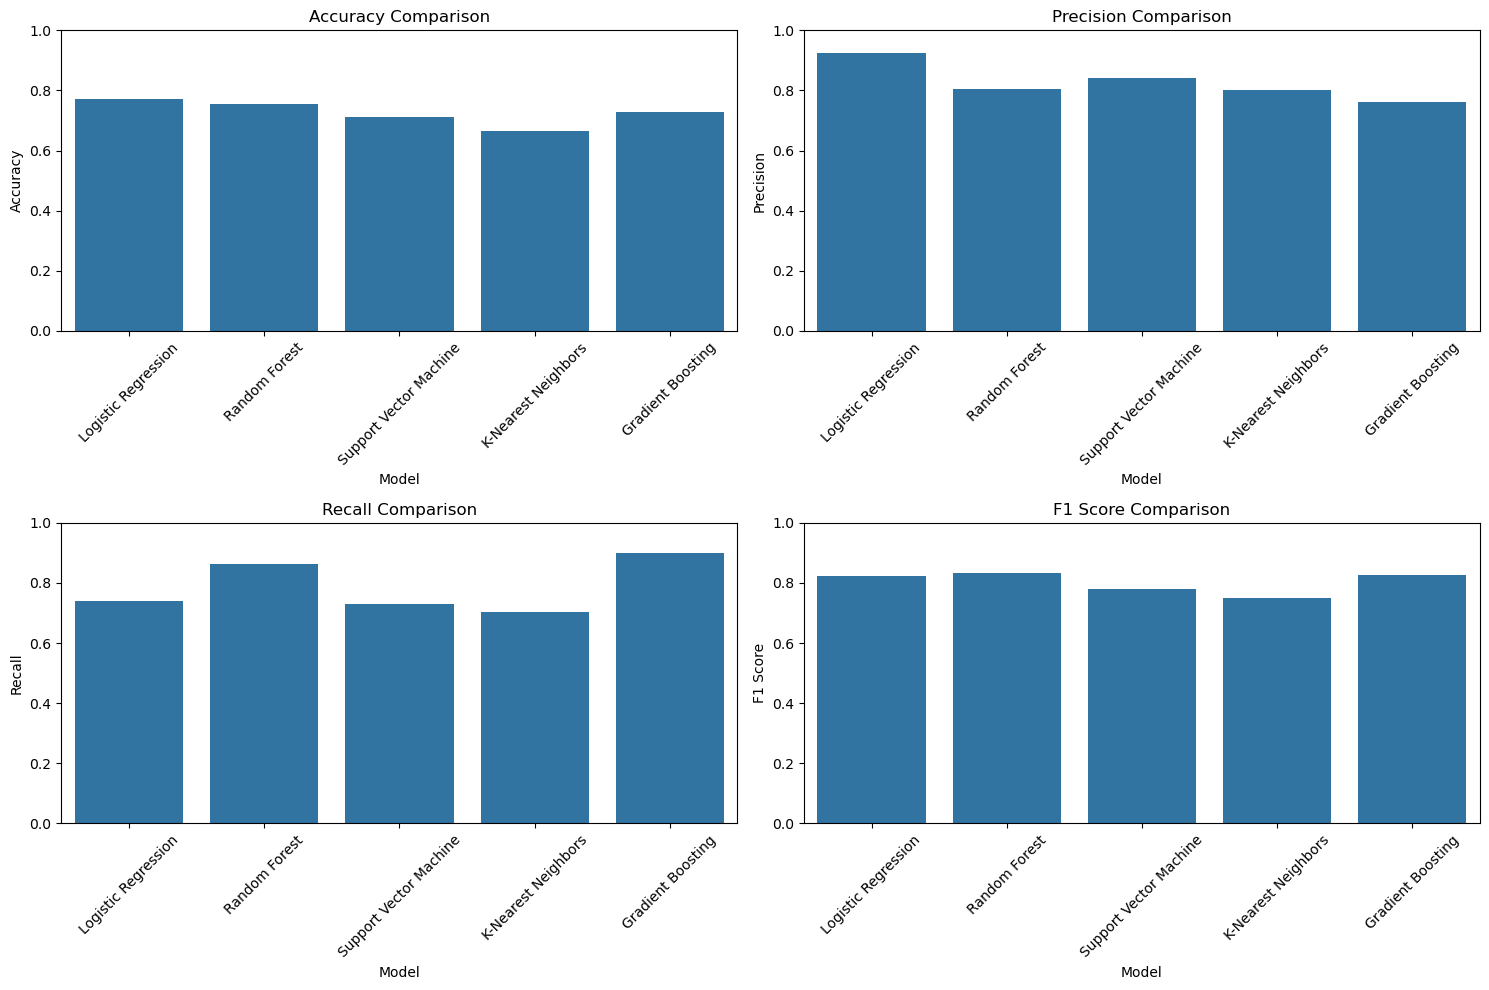


Best performing model based on F1 Score: Random Forest


In [ ]:
# Create a comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Gradient Boosting'],
    'Accuracy': [lr_results['accuracy'], rf_results['accuracy'],
                 svm_results['accuracy'], knn_results['accuracy'], gb_results['accuracy']],
    'Precision': [lr_results['precision'], rf_results['precision'],
                 svm_results['precision'], knn_results['precision'], gb_results['precision']],
    'Recall': [lr_results['recall'], rf_results['recall'],
              svm_results['recall'], knn_results['recall'], gb_results['recall']],
    'F1 Score': [lr_results['f1'], rf_results['f1'],
                svm_results['f1'], knn_results['f1'], gb_results['f1']],
    'ROC-AUC': [lr_results['auc'], rf_results['auc'],
               svm_results['auc'], knn_results['auc'], gb_results['auc']],
    'CV Accuracy': [lr_results['cv_accuracy'], rf_results['cv_accuracy'],
                   svm_results['cv_accuracy'], knn_results['cv_accuracy'], gb_results['cv_accuracy']]
})

# Display the comparison table
print("\nModel Comparison:")
print(model_comparison)

# Plot the comparison
plt.figure(figsize=(15, 10))

# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=model_comparison)
plt.title('Precision Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=model_comparison)
plt.title('Recall Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# F1 Score comparison
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=model_comparison)
plt.title('F1 Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Find the best model based on F1 score (balances precision and recall)
best_model_index = model_comparison['F1 Score'].idxmax()
best_model = model_comparison.loc[best_model_index, 'Model']
print(f"\nBest performing model based on F1 Score: {best_model}")

### Report

###### Problem Understanding and Objective Definition

- **Problem**: The goal is to create a model that can predict the presence or absence of liver disease.  
- **Objective**: The model should accurately classify patients into categories such as patients having:
    - 0. No liver disease  
    - 1. Liver disease  
- **Model Type**: Classification Model. This is because the target variable is categorical (e.g., presence or absence of disease).  

###### Data Characteristics and Preprocessing

- **Data Type**: The dataset includes both numerical (e.g., total bilirubin, Albumin levels) and categorical (e.g., gender) variables.  
- **Outlier Handling**: Since the data does not have a normal distribution, we used IQR to identify and cap or remove extreme outliers (less than 5%) to ensure balanced data distribution.  
- **Duplicate Values**: Detected and removed duplicate rows to ensure no redundancy in the dataset.  
- **Removal of Columns with High Correlation**: Removed columns with high correlation (e.g., **direct bilirubin**, with a correlation greater than 0.8).  
- **Missing Data**: Replaced null values with the median of the respective column.  

###### Scaling and Imbalanced Target

- **Feature Scaling**: We applied **StandardScaler** to scale the data, standardizing the features to ensure better model performance by treating all features equally, especially when they have different ranges.  
- **Handling Class Imbalance**: To reduce model bias toward the majority class, we used **SMOTE (Synthetic Minority Over-sampling Technique)**.  

###### Model Selection

- **Model Type Choices**:
    - **Logistic Regression**: A simple, supervised ML model suitable for a binary classification task (e.g., disease vs. no disease).  
    - **Random Forest**: An ensemble method that is robust to overfitting and works well with high-dimensional data, offering the ability to handle both numerical and categorical features.  
    - **Support Vector Machines (SVM)**: Effective for higher-dimensional data and can be used for both binary and multiclass classification.  
    - **Gradient Boosting (XGBoost, LightGBM)**: Strong performance in predicting liver disease stages, especially when non-linear relationships exist between features.  
- The final choice of model would depend on performance during evaluation and the trade-off between accuracy and interpretability.  

##### Evaluation Metrics

- **Accuracy**: To determine the percentage of correct predictions overall.  
- **Precision, Recall, and F1-Score**: Important for handling imbalanced classes by focusing on both false positives and false negatives.  
- **ROC-AUC**: Given that liver disease prediction is a binary classification task, AUC (Area Under Curve) is crucial for evaluating model performance at various thresholds.  
- **Confusion Matrix**: To visualize how well the model is classifying each disease stage, detecting the true positives and false negatives.  

###### Model Evaluation and Validation

- **Cross-Validation**: To ensure that the model generalizes well to unseen data, reducing the risk of overfitting to the training set. K-fold cross-validation is used to test the model on different subsets of the data.  
- **Training-Test Split**: A common practice is splitting the data into training and testing sets to evaluate the model generalization.  

###### Model Comparison

- **Logistic Regression** shows the highest **Precision** (92.31%) and **ROC-AUC** (84.99%), indicating it's excellent at correctly identifying positive class instances while maintaining a good balance between precision and recall. However, its **CV Accuracy** (69.23%) is the lowest, meaning it might overfit the training data.  

- **Random Forest** has a lower **Precision** (80.46%) compared to Logistic Regression but performs well in **Recall** (86.42%) and **F1 Score** (83.33%). Its **CV Accuracy** (80.31%) is the highest, showing that it generalizes better across cross-validation folds.  

- **Support Vector Machine (SVM)** has a moderate **Precision** (84.29%) and **Recall** (72.84%) with a relatively good **ROC-AUC** (81.07%). Its **CV Accuracy** (71.08%) suggests it's somewhat reliable but not the best in terms of generalization.  

- **K-Nearest Neighbors (KNN)** has the lowest **Accuracy** (66.67%) and **F1 Score** (75.00%) but maintains decent **Precision** (80.28%) and **Recall** (70.37%). It performs poorly in **CV Accuracy** (68.77%), implying potential overfitting or underfitting.  

- **Gradient Boosting** has a high **Recall** (90.12%), making it great at identifying positive instances, but its **Precision** (76.04%) is lower. The **F1 Score** (82.49%) suggests a good trade-off between precision and recall, but its **CV### Conclusion:

- **For high Precision** (minimizing false positives), **Logistic Regression** is the best option.  
- **For maximizing Recall** (detecting most of the positive cases), **Gradient Boosting** is the strongest performer.  
- **For a well-rounded model** that balances **Precision**, **Recall**, and stability, **Random Forest** is the optimal choice.  

---

### Best Model: **Random Forest**

- **Accuracy**:  
  Random Forest achieves a solid **CV Accuracy of 80.31%**, demonstrating it generalizes well to unseen data.

- **Recall (86.42%)**:  
  Random Forest excels in **Recall**, which is crucial in medical datasets like liver disease prediction, where identifying as many positive cases (patients with liver disease) as possible is important.

- **Balanced Performance**:  
  Random Forest strikes a balance between **Precision (80.46%)** and **Recall**, ensuring that it minimizes false positives while detecting most of the positive cases.

- **F1 Score (83.33%)**:  
  The high **F1 Score** reflects that Random Forest balances **Precision** and **Recall**, which is essential for medical diagnoses where both false positives and false negatives have significant consequences.
in the context of liver disease prediction.
